<img style="float:right" src="https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true" alt="Insper">

# Programa Avançado em Data Science e Decisão [»](https://www.insper.edu.br/pt/cursos/pos-graduacao/programas-avancados/programas-avancados-data-science-e-decisao)
## Data Science Deploy

<h3 style="color:brown">VSP Deploy: Local e em nuvem (VMs)</h3>

Nesta aula vamos criar WEB API com Flask, publicar localmente e em uma máquina virtual na Internet (VSP - Virtual Private Server).

WEB API com Flask: Como publicar seus modelos como serviço WEB

Local e em nuvem VPS (Virtual Private Server) Linux

A documentação online do Flask e Requests são muito boas!

<img src="https://flask.palletsprojects.com/en/stable/_images/flask-horizontal.png" width="300" style="float:left"> 
<img src="https://requests.readthedocs.io/en/latest/_static/requests-sidebar.png" width="200" style="float:right">

Objetivos deata aula:

- Vamos publicar WEB Services localmente e<br>
- Vamos publicar os mesmos WEB Services em nuvem em servidores Linux (VPS - Virtual Private Servers)
- Vamos publicar os mesmos WEB Services em nuvem como Serverless

Um serviço da web (WEB Service) é: um serviço oferecido por um dispositivo eletrônico a outro dispositivo eletrônico, de máquina para máquina, comunicando-se entre si através da Internet usando protocolo TCP/IP e HTTP. Ou fornecido por um servidor, ouvindo solicitações em uma determinada porta em uma rede, servindo como resposta dados em formatos diversos (json, xml, csv, html, txt, xlsx, etc...)

Podemos criar nosso WEB Services (WEB API) em Python com o Flask, e este serviço pode ser disponibilizado em uma rede interna ou na Internet. E este recurso torna nosso código e modelos em Python acessíveis por qualquer outra linguagem de programação tal como Java, Go, C#, Ruby, PHP, entre outras. Os web services podem também ser consumidos por aplicativos WEB ou mobile (Android ou iOS).

Processo básico:

1. Criar seu modelo
2. Colocar seu modelo em uma biblioteca (arquivo .py)
3. Criar a WEB API com Flask para tornar seu modelo acessível
4. Fazer o teste local (locahost)
5. Subir o codigo do projeto no GitHub
6. Utilizar GitHub Actions para publicar o código em uma VPS em núvem
7. Testar o acesso do servico pela Internet

Documentação:

- Flask: https://flask.palletsprojects.com/
- Requests: https://docs.python-requests.org/en/latest/

Dicas de Linux:

https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Dica-019.ipynb

Com **!** no início do código em uma célula (magic) podemos executar os comandos do SO (Linux no caso)

In [ ]:
!date

Podemos consumir com **curl** ou requests uma WEB API (WEB Service) que fornece dados GEO informado o nome do Insper apenas...

Instalar o **curl** no Linux (WLS2):

sudo apt install curl

sudo apt install wget

In [1]:
!curl "https://nominatim.openstreetmap.org/search.php?q=Insper&format=jsonv2"

[{"place_id":8244770,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"way","osm_id":124962732,"lat":"-23.5987249","lon":"-46.67643049021903","category":"amenity","type":"university","place_rank":30,"importance":0.4594718687885376,"addresstype":"amenity","name":"Insper","display_name":"Insper, 300, Rua Quatá, Vila Olímpia, Itaim Bibi, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, 04546-042, Brasil","boundingbox":["-23.5989711","-23.5982227","-46.6772417","-46.6761522"]},{"place_id":8390267,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"way","osm_id":687476094,"lat":"-23.59895865","lon":"-46.675683293368095","category":"amenity","type":"university","place_rank":30,"importance":7.861829556720863e-05,"addresstype":"amenity","name":"Insper","display_name":"Insper, 200, Rua Quatá, Vila Olímpia, Itaim

In [2]:
!curl "https://nominatim.openstreetmap.org/search.php?q=IBM+Brazil&format=jsonv2"

[{"place_id":8151431,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"way","osm_id":27030323,"lat":"-23.5799788","lon":"-46.64926899968789","category":"building","type":"yes","place_rank":30,"importance":7.861829556720863e-05,"addresstype":"building","name":"IBM","display_name":"IBM, 1157, Rua Tutóia, Moema, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, 04007-900, Brasil","boundingbox":["-23.5802994","-23.5796875","-46.6495605","-46.6489428"]},{"place_id":7602489,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"node","osm_id":5780143853,"lat":"-30.0461546","lon":"-51.2306162","category":"office","type":"company","place_rank":30,"importance":7.33218890668653e-05,"addresstype":"office","name":"IBM","display_name":"IBM, Rua Manoelito de Ornellas, Praia de Belas, Porto Alegre, Região Geográfica Imedi

In [4]:
requests.get(URL).json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [10]:
import requests

URL="https://nominatim.openstreetmap.org/search.php?q=Livraria+da+Vila+Sao+Pauloo&format=jsonv2"

end = requests.get(URL).json()

end
#json - dict (Dicionário do Python)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

URLHACK="https://nominatim.openstreetmap.org/search.php?q=Livraria+Cultura+Sao+Paulo&format=jsonv2"

response = requests.get(URLHACK, headers=headers)

print(response.content)

b'[{"place_id":8667296,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"node","osm_id":10007826020,"lat":"-23.5590503","lon":"-46.6600852","category":"shop","type":"books","place_rank":30,"importance":7.861829556720863e-05,"addresstype":"shop","name":"Livraria Cultura","display_name":"Livraria Cultura, Galerias, Cerqueira C\xc3\xa9sar, Jardim Paulista, S\xc3\xa3o Paulo, Regi\xc3\xa3o Imediata de S\xc3\xa3o Paulo, Regi\xc3\xa3o Metropolitana de S\xc3\xa3o Paulo, Regi\xc3\xa3o Geogr\xc3\xa1fica Intermedi\xc3\xa1ria de S\xc3\xa3o Paulo, S\xc3\xa3o Paulo, Regi\xc3\xa3o Sudeste, 01311-300, Brasil","boundingbox":["-23.5591003","-23.5590003","-46.6601352","-46.6600352"]},{"place_id":8590133,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"node","osm_id":2317888297,"lat":"-23.5433481","lon":"-46.6566748","category":"amenity","type":"bank","place_rank":30,"importance":7.861829556720863e-05,"a

In [15]:
import pandas as pd

In [16]:
pd.DataFrame(response.json())

,place_id,licence,osm_type,osm_id,lat,lon,category,type,place_rank,importance,addresstype,name,display_name,boundingbox
0,8667296,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,10007826020,-23.5590503,-46.6600852,shop,books,30,0.000079,shop,Livraria Cultura,"Livraria Cultura, Galerias, Cerqueira César, J...","[-23.5591003, -23.5590003, -46.6601352, -46.66..."
1,8590133,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,2317888297,-23.5433481,-46.6566748,amenity,bank,30,0.000079,amenity,Livraria Cultura,"Livraria Cultura, Avenida Angélica, Higienópol...","[-23.5433981, -23.5432981, -46.6567248, -46.65..."
2,9239403,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,7973675689,-21.2265916,-47.8345057,shop,books,30,0.000066,shop,Livraria Cultura,"Livraria Cultura, Avenida Doutor Albert Sabin,...","[-21.2266416, -21.2265416, -47.8345557, -47.83..."


In [12]:
URL

'https://nominatim.openstreetmap.org/search.php?q=Livraria+da+Vila+Sao+Pauloo&format=jsonv2'

In [6]:
req = requests.get(URL)

In [8]:
req.text

'<html>\n<head>\n<title>Access blocked</title>\n</head>\n<body>\n<h1>Access blocked</h1>\n\n<p>You have been blocked because you have violated the\n<a href="https://operations.osmfoundation.org/policies/nominatim/">usage policy</a>\nof OSM\'s Nominatim geocoding service. Please be aware that OSM\'s resources are\nlimited and shared between many users. The usage policy is there to ensure that\nthe service remains usable for everybody.</p>\n\n<p>Please review the terms and make sure that your\nsoftware adheres to the terms. You should in particular verify that you have set a\n<b>custom HTTP referrer or HTTP user agent</b> that identifies your application, and\nthat you are not overusing the service with massive bulk requests.</p>\n\n<p>If you feel that this block is unjustified or remains after you have adopted\nyour usage, you may contact the Nominatim system administrator at\nnominatim@openstreetmap.org to have this block lifted.</p>\n</body>\n</head>\n'

In [17]:
# Alternativa: guardei o JSON da query no GitHub

end = requests.get("https://github.com/danielscarvalho/data/blob/master/osm-livcultura.json?raw=true").json()

In [19]:
pd.DataFrame(end)

,place_id,licence,osm_type,osm_id,lat,lon,category,type,place_rank,importance,addresstype,name,display_name,boundingbox
0,8207332,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,10007826020,-23.5590503,-46.6600852,shop,books,30,0.000079,shop,Livraria Cultura,"Livraria Cultura, Galerias, Cerqueira César, J...","[-23.5591003, -23.5590003, -46.6601352, -46.66..."
1,8351986,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,2317888297,-23.5433481,-46.6566748,amenity,bank,30,0.000079,amenity,Livraria Cultura,"Livraria Cultura, Avenida Angélica, Higienópol...","[-23.5433981, -23.5432981, -46.6567248, -46.65..."
2,8830624,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,7973675689,-21.2265916,-47.8345057,shop,books,30,0.000066,shop,Livraria Cultura,"Livraria Cultura, Avenida Doutor Albert Sabin,...","[-21.2266416, -21.2265416, -47.8345557, -47.83..."


Verificando os dados do JSON

In [20]:
type(end), len(end), type(end[0])

(list, 3, dict)

In [21]:
import pandas as pd

pd.DataFrame(end)

,place_id,licence,osm_type,osm_id,lat,lon,category,type,place_rank,importance,addresstype,name,display_name,boundingbox
0,8207332,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,10007826020,-23.5590503,-46.6600852,shop,books,30,0.000079,shop,Livraria Cultura,"Livraria Cultura, Galerias, Cerqueira César, J...","[-23.5591003, -23.5590003, -46.6601352, -46.66..."
1,8351986,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,2317888297,-23.5433481,-46.6566748,amenity,bank,30,0.000079,amenity,Livraria Cultura,"Livraria Cultura, Avenida Angélica, Higienópol...","[-23.5433981, -23.5432981, -46.6567248, -46.65..."
2,8830624,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,7973675689,-21.2265916,-47.8345057,shop,books,30,0.000066,shop,Livraria Cultura,"Livraria Cultura, Avenida Doutor Albert Sabin,...","[-21.2266416, -21.2265416, -47.8345557, -47.83..."


Este exemplo de WEB Service, retorna um JSON (dict) com informações de clima dado a GEO localização, latitude o longitude do Insper:

In [25]:
import requests

KEY="e5cdb1ac5452815cc556ad568df2c2e8"
LAT=-23.5987249
LON=-46.67643049021903

URL=f"https://api.openweathermap.org/data/2.5/weather?lat={LAT}&lon={LON}&appid={KEY}"
URLv3=f"https://api.openweathermap.org/data/3.0/onecall?lat={LAT}&lon={LON}&appid={KEY}"

requests.get(URL).json()

{'coord': {'lon': -46.6764, 'lat': -23.5987},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 295.6,
  'feels_like': 296.17,
  'temp_min': 295.01,
  'temp_max': 296.2,
  'pressure': 1017,
  'humidity': 87,
  'sea_level': 1017,
  'grnd_level': 927},
 'visibility': 9000,
 'wind': {'speed': 5.14, 'deg': 140},
 'clouds': {'all': 100},
 'dt': 1742248854,
 'sys': {'type': 1,
  'id': 8446,
  'country': 'BR',
  'sunrise': 1742202556,
  'sunset': 1742246447},
 'timezone': -10800,
 'id': 3461570,
 'name': 'Ibirapuera',
 'cod': 200}

In [26]:
pd.DataFrame([requests.get(URL).json()])

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod
0,"{'lon': -46.6764, 'lat': -23.5987}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 295.6, 'feels_like': 296.17, 'temp_mi...",9000,"{'speed': 5.14, 'deg': 140}",{'all': 100},1742248854,"{'type': 1, 'id': 8446, 'country': 'BR', 'sunr...",-10800,3461570,Ibirapuera,200


WEB API para busca de CEP: https://viacep.com.br/

In [27]:
import requests

requests.get("https://viacep.com.br/ws/01001000/json/").json()

{'cep': '01001-000',
 'logradouro': 'Praça da Sé',
 'complemento': 'lado ímpar',
 'unidade': '',
 'bairro': 'Sé',
 'localidade': 'São Paulo',
 'uf': 'SP',
 'estado': 'São Paulo',
 'regiao': 'Sudeste',
 'ibge': '3550308',
 'gia': '1004',
 'ddd': '11',
 'siafi': '7107'}

In [28]:
pd.DataFrame([requests.get("https://viacep.com.br/ws/01001000/json/").json()])

,cep,logradouro,complemento,unidade,bairro,localidade,uf,estado,regiao,ibge,gia,ddd,siafi
0,01001-000,Praça da Sé,lado ímpar,,Sé,São Paulo,SP,São Paulo,Sudeste,3550308,1004,11,7107


In [29]:
pd.DataFrame([requests.get("https://viacep.com.br/ws/01001000/json/").json()]).T

,0
cep,01001-000
logradouro,Praça da Sé
complemento,lado ímpar
unidade,
bairro,Sé
localidade,São Paulo
uf,SP
estado,São Paulo
regiao,Sudeste
ibge,3550308


In [30]:
!curl viacep.com.br/ws/03819250/json/

{
  "cep": "03819-250",
  "logradouro": "Rua Água Nova",
  "complemento": "",
  "unidade": "",
  "bairro": "Parque Císper",
  "localidade": "São Paulo",
  "uf": "SP",
  "estado": "São Paulo",
  "regiao": "Sudeste",
  "ibge": "3550308",
  "gia": "1004",
  "ddd": "11",
  "siafi": "7107"
}

In [31]:
!curl viacep.com.br/ws/03819250/xml/

<?xml version="1.0" encoding="UTF-8"?>
<xmlcep>
  <cep>03819-250</cep>
  <logradouro>Rua Água Nova</logradouro>
  <complemento></complemento>
  <unidade></unidade>
  <bairro>Parque Císper</bairro>
  <localidade>São Paulo</localidade>
  <uf>SP</uf>
  <estado>São Paulo</estado>
  <regiao>Sudeste</regiao>
  <ibge>3550308</ibge>
  <gia>1004</gia>
  <ddd>11</ddd>
  <siafi>7107</siafi>
</xmlcep>

Note como fica a URL que faz a chamada da WEB API, isso funciona no browser também... pois estamos usando o protocolo HTTP/S, para criar WEB Services (WEB API) utiliza-se os mesmos recursos da tecnologia WEB... dado sua simplicidade e accessibilidade...

- Uma visão geral do HTTP: https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Overview

<img src="https://igluonline.com/wp-content/uploads/2018/12/como-funciona-http.jpg.jpg" width="600px">

In [ ]:
URL

> Agora vamos criar nosso próprios serviços WEB (WEB Servie ou WEB API) com Flask

In [ ]:
!conda install flask -y

In [ ]:
!pip3 install flask

In [ ]:
!conda install requests

In [ ]:
!pip3 install requests

Agora vamos trabalhar fora do ambiente Jupyter, vamos trabalhar com python em arquivos texto .py, ambiente script na linha de comando. Isso funciona no Linux, Mac ou Windows.

Criar uma pasta de tralbalho (projeto), e criar o arquivo **insperds.py** que é nossa biblioteca de funções

```Python
import requests

def ddgquery(query):
    URL = "https://api.duckduckgo.com/?format=json&pretty=0&q=" + query
    response = requests.get(URL)
    ddg = response.json()
    info = ddg["Abstract"]
    if len(info) > 1:
        return info
    else:
    	return "Ops! No data found!" 

def bitcoins():
    URL="https://www.mercadobitcoin.net/api/BTC/trades/"
    response = requests.get(URL)
    return {"btc":response.json()}

def ethereum():
    URL="https://www.mercadobitcoin.net/api/ETH/trades/"
    response = requests.get(URL)
    return {"eth":response.json()}

def weather(latitude, longitude):
    KEY = "ed38d2abac6e6aded3cf1ed68fddb3c6"
    URL = f'https://api.openweathermap.org/data/2.5/weather?lat=' + str(latitude) + '&lon=' + str(longitude) + '&appid='+ KEY
    return requests.get(URL).json()
```

Agora vamos criar o script que executa as WEB APIs em Flask **core.py**

```python
# A simple Flask Hello World WEB API to get started with...

from flask import Flask
from flask import request
from datetime import datetime
import insperds

app = Flask(__name__)

@app.route('/')
def hello_world():
    now = datetime.now()
    return 'Hello from Flask, by Insper DS! - ' + str(now)

@app.route('/core')
def core():
    now = datetime.now()
    return 'Vai Corinthians!! - ' + str(now) 

@app.route('/add/<a>/<b>')
def add(a, b):
    return str(float(a) + float(b))

@app.route('/area')
def myarea():
  altura = request.args.get('altura', default = 0, type = float)
  largura = request.args.get('largura', default = 0, type = float)
  comprimento = request.args.get('comprimento', default = -1, type = float)
  
  if (comprimento < 0):
        return str(altura*largura)
  else:
        return str(altura*largura*comprimento)

@app.route('/query/<text>')
def query(text):
    return insperds.ddgquery(text)
    
@app.route('/bitcoins')
def btc():
    return insperds.bitcoins()
    
@app.route('/ethereum')
def ether():
    return insperds.ethereum()
    
@app.route('/weather/<lat>/<lon>')
def weather(lat, lon):
    return insperds.weather(lat, lon)
            
```

Versões mais atualizadas, repos do GitHub:

- https://github.com/danielscarvalho/flask-local
- https://github.com/danielscarvalho/insper-flask-ds

Precisamos instalar o Flask no sistema operacional (SO - Linux e Mac):
    
```bash
sudo apt install flask
```
ou

```bash
sudo apt install python3-flask
```

Podemos executar os comandos abaixo (Linux e Mac) ou criar um script **run.sh**


```bash
export FLASK_APP=core
flask run --host=0.0.0.0
```

A porta padrão do Flask é a 5000, lembre-se de liberar esta porta no firewall...<br>
O comando host com o IP 0.0.0.0 significa que esta aplicação atende a chamada (inbound) proveniente de qualquer endereço IP<br>
O comando export cria uma variável de ambiente no SO (chave valor)

> Outra forma de executar um progra Flask na linha de comando, por exemplo, app.py:<br>
> flask --host=0.0.0.0 --port=5000 run app

A janela do Flask em linha de comando fica aberta e podemos ver as requisições no log.

```bash
fito@acme-lab:/work/Insper/workshop3/flask-local$ sh run.sh
 * Serving Flask app "core"
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [1/Feb/2022 02:54:12] "GET /core HTTP/1.1" 200 -
127.0.0.1 - - [1/Feb/2022 02:54:25] "GET /add/10/333 HTTP/1.1" 200 -
127.0.0.1 - - [1/Feb/2022 02:54:38] "GET /query/brasil HTTP/1.1" 200 -


```

É possível também no Linux (Bash) deixar o flask rodando em background (segundo plano - serviço)

```bash
nohup flask --host=0.0.0.0 --port=5000 run app &
```

Desta forma mesmo fechando a conexão ssh o flask continua em execução, a saída do log é acumulada no arquivo "nohup.out". Veja mais em: https://linux.die.net/man/1/nohup

> Loop back address: localhost ou 127.0.0.1

Podemos testar o serviço com o utilitário CLI **curl** ou no próprio notebook com o **requests**, com o browser é possível para o verbo HTTP GET

In [32]:
!curl http://localhost:5000/core

Vai Corinthians!! - 2025-03-17 19:56:41.822271

In [33]:
!curl http://localhost:5000/add/102/333

435.0

In [34]:
!curl http://localhost:5000/query/brasil

Brazil, officially the Federative Republic of Brazil, is the largest and easternmost country in South America. It is the world's fifth-largest country by area and the seventh largest by population, with over 212 million people. The country is a federation composed of 26 states and a Federal District, which hosts the capital, Brasília. Its most populous city is São Paulo, followed by Rio de Janeiro. Brazil has the most Portuguese speakers in the world and is the only country in the Americas where Portuguese is an official language. Bounded by the Atlantic Ocean on the east, Brazil has a coastline of 7,491 kilometers. Covering roughly half of South America's land area, it borders all other countries and territories on the continent except Ecuador and Chile. Brazil encompasses a wide range of tropical and subtropical landscapes, as well as wetlands, savannas, plateaus, and low mountains.

Agora o texto usando o requests no Jupyter notebook:

In [35]:
import requests

r=requests.get("http://localhost:5000/query/IBM")
r.text

'Ops! No data found!'

Servidor virtual no Oracle Cloud

In [ ]:
import requests

r=requests.get("http://129.213.14.122:5000/query/Brasil")
r.text

In [ ]:
!curl 129.213.14.122:5000/add/23/3444

Servidor virtual no GCP (Google Cloud)

In [ ]:
!curl 34.139.87.194:5000/add/23/44

In [ ]:
import requests

r=requests.get("http://34.139.87.194:5000/query/Brasil")
r.text

O processo para colocar o serviço no ar em nosso computador local (Linux ou Mac) é igual para colocar estes serviços em uma máquina virtual Linux (servidor) em nuvem (VPS - Virtual Private Server).

O ambiente em nuvem precisamos configurar o domínio (DNS) e a camada de seguranças (Firewalls etc...), conforme cada provedor.

### Máquina Virtual (VM) Linux em nuvem

Virtual Private Server (VPS)

Linux Ubuntu - https://ubuntu.com/

Testes no Oracle Cloud:

```bash
root@web-app-server-01:~# hostname
web-app-server-01
root@web-app-server-01:~# uptime
 01:37:04 up 10 days,  6:37,  1 user,  load average: 0.02, 0.01, 0.00
root@web-app-server-01:~# uname -a
Linux web-app-server-01 5.11.0-1027-oracle #30~20.04.1-Ubuntu SMP Thu Jan 13 09:43:40 UTC 2022 aarch64 aarch64 aarch64 GNU/Linux
root@web-app-server-01:~# python3 --version
Python 3.8.10
```

Testes no Microsoft Azure:

```bash
fitoplancton@app-07:~$ hostname
app-07
fitoplancton@app-07:~$ uptime
 02:36:50 up 370 days, 20:49,  1 user,  load average: 0.00, 0.03, 0.02
fitoplancton@app-07:~$ uname -a
Linux app-07 4.18.0-1013-azure #13~18.04.1-Ubuntu SMP Thu Feb 28 23:48:47 UTC 2019 x86_64 x86_64 x86_64 GNU/Linux
fitoplancton@app-07:~$ python3 --version
Python 3.6.9
```

Podemos conectar so servidor Linux (VM) em nuvem pela linha de comando usando o **ssh** no Linux e Mac:


Oracle...<br>
**ssh -i ssh-key-2022-02-13.key ubuntu@w1.code.eng.br**

Microsoft...<br>
**ssh fitoplancton@lab.code.eng.br**

ou<br>
**ssh maria@253.34.223.3**

Para client Windows utilizamos o PuTTY - https://www.putty.org/

Note que as versões do Python disponíveis são diferentes, no seu ambiente local e entre os servidores!!! E não foi instalado com o Anaconda.

Vamos ver na máquina local:

In [ ]:
!python --version

In [ ]:
!python --version

In [ ]:
!conda --version

**LAB!** Vamos para o ambiente em um servidor Linux em nuvem - VPS!!!

 > Será realizada demonstração de alguns tópicos do workshop/aula. Os serviços em nuvem requerem registro e cadastro com catão de crédito e em alguns casos CNPJ também. E vamos experimentar serviços de diferentes provedores... há riscos financeiros ao utilizar ambientes de *cloud computing* mesmo que para estudo e testes. Fique atento para não deixar recursos ligados após o uso, pois a cobrança é feita por hora!

### Microsoft Azure - VM Linux

Podemos obter acesso a recursos gratuitos na núvem da Microsoft, usando o e-mail do Insper:

https://azure.microsoft.com/pt-br/free/students/

Conectando via SSH (Linha de comando)

```bash
fito@acme-lab:/work/Insper/Insper-Data-Science-Deploy$ ssh fitoplancton@lab.code.eng.br
fitoplancton@lab.code.eng.br's password: 
Welcome to Ubuntu 18.04.2 LTS (GNU/Linux 4.18.0-1013-azure x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

  System information as of Fri Feb 25 12:26:16 UTC 2022

  System load:  0.1                Processes:           118
  Usage of /:   31.0% of 28.90GB   Users logged in:     0
  Memory usage: 37%                IP address for eth0: 10.0.0.4
  Swap usage:   5%

 * Ubuntu's Kubernetes 1.14 distributions can bypass Docker and use containerd
   directly, see https://bit.ly/ubuntu-containerd or try it now with

     snap install microk8s --channel=1.14/beta --classic

  Get cloud support with Ubuntu Advantage Cloud Guest:
    http://www.ubuntu.com/business/services/cloud

 * Canonical Livepatch is available for installation.
   - Reduce system reboots and improve kernel security. Activate at:
     https://ubuntu.com/livepatch

131 packages can be updated.
3 updates are security updates.


*** System restart required ***
Last login: Thu Feb 24 02:21:13 2022 from 201.83.118.214
fitoplancton@app-07:~$ 

```

Acesso via IP público ou pelo domínio... liberar a porta no Firewall...

In [ ]:
!curl http://lab.code.eng.br:5000/

In [ ]:
!curl http://lab.code.eng.br:5000/query/Insper

Console do Flask no servidor Linux na Macrosoft Azure (Note que está sem chave SSL, protocolo HTTPS)

<img src="img/flask-azure.png">

Este serviço pode ser acessado de algumas formas diferentes, pelo número IP, pelo domínio (DNS), ou pelo domínio fornecido pelo provedor:

In [ ]:
!curl http://13.77.179.189:5000/add/23/44

In [ ]:
!curl http://lab.code.eng.br:5000/add/66/124

In [ ]:
!curl http://eng.westus2.cloudapp.azure.com:5000/add/99.99/-244

Lembrando que o DNS (Domain Name System), ou domínio, aponta para um endereço IP (Internet Protocol).

Um número IP é um endereço exclusivo que identifica um dispositivo ou servidor (físico ou virtual) na Internet ou em uma rede local.

- [DNS](https://en.wikipedia.org/wiki/Domain_Name_System)
- [IP](https://www.kaspersky.com/resource-center/definitions/what-is-an-ip-address)

> Há nos ambientes em nuvem como da Microsoft Azure, máquinas virtuais prontas (templates) para ciências dos dados, um tipo de marketplace, que já vem com o Anaconda, Python, Flask, etc... já pré instalado

### Rede e Segurança

Para o domínio de lab (válido na Internet) **code.eng.br**, configuramos os IPs dos serviços em núvem no gerenciador de DNS (Domínios), apontado os IPs para um subdomínio:
<img src="img/dns-subdominio.png">
Esta configuração é normalmente feita no ambiente WEB do provedor de DNS.

Um domínio custa por volta de 30,00 a 40,00 reais ao ano.

Verificando no Bash (Linux) para onde o domínio aponta, para qual número IP:

```bash
root@acme-lab:/work/Insper$ nslookup w1.code.eng.br
Server:		127.0.0.53
Address:	127.0.0.53#53

Non-authoritative answer:
Name:	w1.code.eng.br
Address: 129.153.157.106

```

Podemos também verificar a propriedade do domínio:

```bash
root@acme-lab:/work/Insper$ whois w1.code.eng.br

% Copyright (c) Nic.br
%  The use of the data below is only permitted as described in
%  full by the terms of use at https://registro.br/termo/en.html ,
%  being prohibited its distribution, commercialization or
%  reproduction, in particular, to use it for advertising or
%  any similar purpose.
%  2022-02-25T02:21:57-03:00 - IP: 2804:14c:c6:878d:a64b:38e2:46b0:15de

domain:      code.eng.br
owner:       Insper
ownerid:     333.777.999-11
country:     BR
owner-c:     ATLME159
tech-c:      ATLME159
nserver:     ns1.locaweb.com.br
nsstat:      20220222 AA
nslastaa:    20220222
nserver:     ns2.locaweb.com.br
nsstat:      20220222 AA
nslastaa:    20220222
nserver:     ns3.locaweb.com.br
nsstat:      20220222 AA
nslastaa:    20220222
saci:        yes
created:     20200629 #21281503
changed:     20210610
expires:     20220629
status:      published
provider:    LOCAWEB (2)

nic-hdl-br:  ATLME159
person:      Insper
e-mail:      danielscarvalho@gmail.com
country:     BR
created:     20200629
changed:     20200629
provider:    LOCAWEB (2)

% Security and mail abuse issues should also be addressed to
% cert.br, http://www.cert.br/ , respectivelly to cert@cert.br
% and mail-abuse@cert.br
%
% whois.registro.br accepts only direct match queries. Types
% of queries are: domain (.br), registrant (tax ID), ticket,
% provider, CIDR block, IP and ASN.
```

O [Firewall](https://pt.wikipedia.org/wiki/Firewall) é um recurso de segurança da informação, que protege uma rede de outra, neste caso protege o servidor virtual no provedor do tráfego de dados que vem da Internet.

Um Firewall é um dispositivo de segurança de rede que monitora e filtra o tráfego de rede de entrada e saída com base nas políticas de segurança previamente estabelecidas de uma organização. Em sua forma mais básica, um firewall é essencialmente a barreira que fica entre uma rede interna privada e a Internet pública.

Alguns provedores tem um nível de firewall (1) configurado via WEB em sua central de controle.<br>

Outros provedores tem dois nívels de seguranças (2) com o software de firewall adicional na máquina virtual (VM) o [iptables](https://www.netfilter.org/), como no Oracle Cloud por exemplo.
<img src="img/firewall-diagram.png">
É necessário nos serviços em núvem, liberar as portas para acesso aos serviços, note que neste caso as portas 22, 443, 80, 8080 e 5000 estão liberadas para entradas (inbound), mas todas as outras estão bloqueadas por seguranças:
<img src="img/regras-firewall.png">

Endereços IP (número IP) são atribuidos ao servidores (físico ou virtual). Os IPs são atribuídos as placas de rede, diversos IPs podem ser atribuídos a mesma placa de rede. E o servidor pode ter diversas placas de rede também.

Temos 2 versões de protocolo de rede TCP/IP em uso IPv4 e IPv6.

Note que temos IPv4, 4 conjunto de 3 números separador por ".", exemplo:

    Localhost: 127.0.0.1
    IP público: 108.139.182.81

IPv6: 8 conjuntos de 4 números separados por ":", exemplo: 

    Localhost: 0000:0000:0000:0000:0000:0000:0000:0001 ou ::1
    IP público: 2600:9000:21ed:bc00:1:5a19:8b40:93a1

Além disto temos as portas, cada programa utiliza uma porta para se comunicar (listen), das portas 0 até 1024 são exclusivas do root (super usuário). São atribuídos serviços padronizados para as portas, conforme segue:

<!-- <img src="https://dirwalk.com/images/common_ports_cheatsheet.jpg" width="600px"> -->
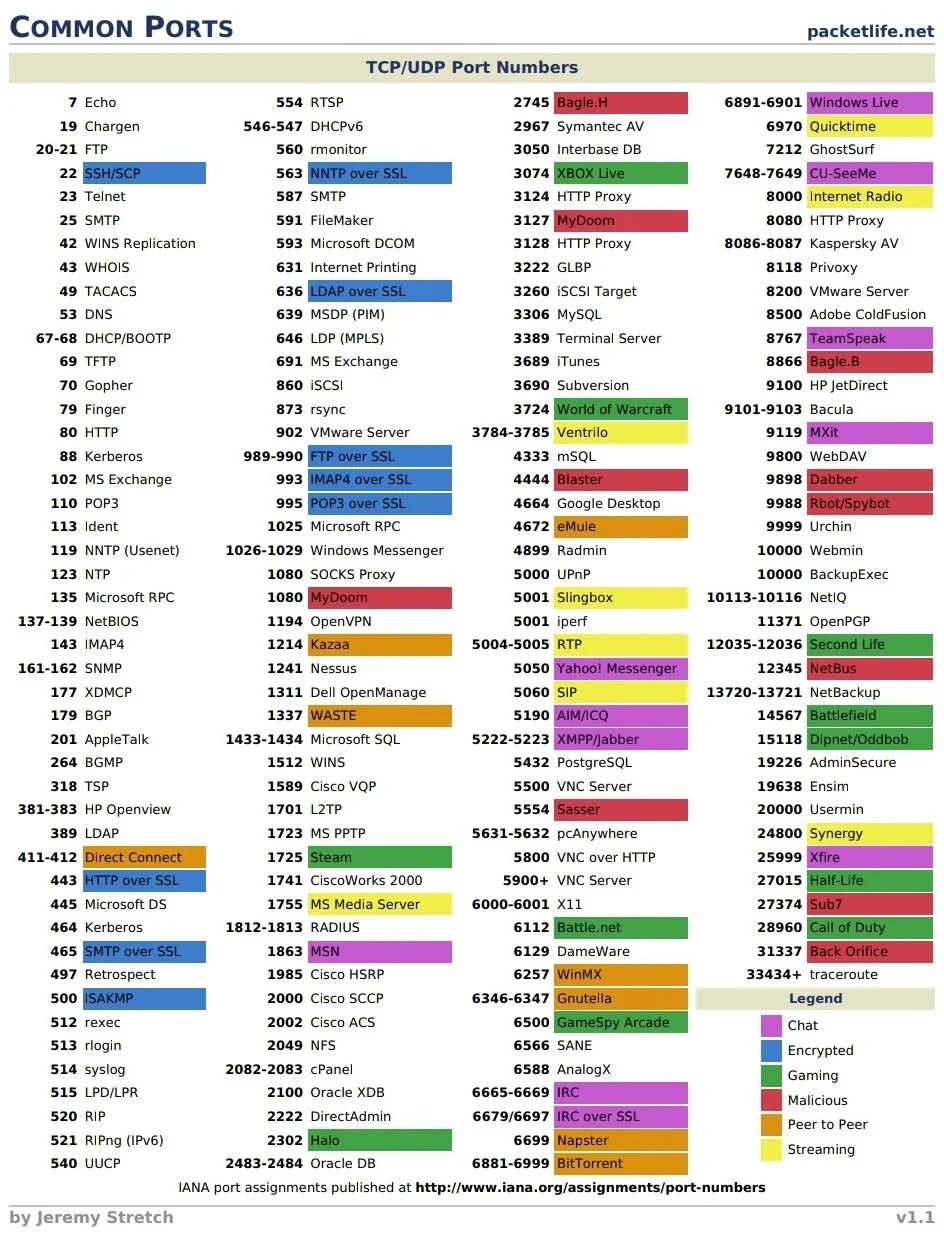

O IP é o "endereço" do servidor, e a porta seria qual "apartamento" deve receber os pacotes! 😜 

O DNS é o "apelido" do endereço, para não termos que decorar os números. O nome (DNS) aponta para um número IP público válido na Internet.

Há outros aspectos de segurança que são importantes como chave de criptografia (SSL, TTL), ACL (Access Control List), etc...

Quando a chamada HTTP é feita para o serviço do Flask que está no servidor, note que o mair tempo se leva na espera do processamento do servidor para realizar computação:

<img src="img/network-timing.png">

Este nível de detalhe pode ser visto no console do browser, ferramenta utlizada por developers. Techas **Ctrl + Shift + i**, pasta Network.

Podemos usar o comando **nohup** do Linux para sair do ambiente e deixar o Flask no are como serviço do Linux.

- https://linux.die.net/man/1/nohup

E também podemos ter várias instâncias do Flask em execução simultaneamente no mesmo servidor Linux (VM) em segundo plano, em portas diferentes (que devem ser liberadas no Firewall, é claro):

```bash
nohup flask --host=0.0.0.0 --port=5001 run app1 &
nohup flask --host=0.0.0.0 --port=5002 run app2 &
nohup flask --host=0.0.0.0 --port=5003 run app3 &
```

Use o comando **htop** para ver os processo em execução em segundo plano. Ou o comando **ps -ef | grep flask**<br>
Para derrubar um processo em segundo plano use o comando **kill -9 zzzz**, sendo zzzz o número do processo.

Todos os ambientes do provedores serviços em nuvem, fornecem máquinas virtuais (VM ou VPS).

São serviços mais flexíveis porem você é responsável por instalar, manter, atualizar, configura, etc... é como ter o seu próprio computador exposto na Internet 24x7x365.

O preço destes serviço variam conforme a capacidade de processamento das VMs, processador, disco, memória e banda Internet. E se os recursos são compartilhados ou dedicados. 

O ambiente do Google Cloud para VMs é chamado *Google Compute Engine*:

<img src="https://cloud.google.com/languages/images/compute-single-instance.svg">

https://cloud.google.com/python/docs/getting-started/getting-started-on-compute-engine

### Extra

Dica senha segura:

Ao usar serviços na Internet, use senhas seguras geradas automaticamente e também use gerenciador de senhas.


A sua senha vai ser quebrada!!<br>
ACREDITE NISSO!!!

- https://password-gen.com/ >> Para não quebrar a sua senha!
- https://www.lastpass.com/pt/features/password-generator >> Gerador de senha segura
- https://keepass.info/ >> Para você lembrar a senha

Exemplos de senha segura:

<pre>
*dk*7OBx7l3p!z5L
^cketGx#NS52^o7^
3j#98v75p2HyR!1o
</pre>

Os computadores pessoais PC Linux, Mac ou Windows tem firewall local, ou seja, se você subir um servoiço com Flask e passar o número IP do seu computador para seus colegas na mesma rede, eles não vão ter acesso. Você vai ter que liberar a porta 5000 (padrão do Flask) no seu firewall local.

Para saber seu IP da rede local no Linux use o comando **ifconfig**, no windows **ipconfig**.

In [ ]:
!ifconfig

Note que há ranges de IPs reservados para uso em redes locais que não podem ser usados na Internet para domínio e sites públicos:

<pre>
192.x.x.x
10.x.x.x
100.x.x.x
172.x.x.x
</pre>

Mais detalhes em: https://en.wikipedia.org/wiki/Reserved_IP_addresses

Para saber seu IP válido na Internet, que é diferente do seu IP da rede local que é protegido... use o link: https://whatismyipaddress.com/ Isso é útil para realizar testes e configuração de firewall. (CUIDADO - Não compartilhe esta informação)


### Dicas:

Para pegar seu IP local com Python:

In [ ]:
import socket

def extract_ip():
    st = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    try:       
        st.connect(('10.255.255.255', 1))
        IP = st.getsockname()[0]
    except Exception:
        IP = '127.0.0.1'
    finally:
        st.close()
    return IP

extract_ip()

A sua rede local, tanto em casa, no trabalho ou na faculdad (Insper), ao conectar seu computador na rede via cabo ou wi-fi, o serviço de DHCP empresa um IP local para você.

Para pegar via Python o seu IP público na Interne

(CUIDADO! PERIDGO! NÃO DIVULGUE ESTA INFORMAÇÃO)

In [ ]:
from requests import get

ip = get('https://api.ipify.org').text

ip

Quando tiver problemas de rede para acessar WEB APIs (inbound) ou publicar WEB APIs (outbound) na rede da sua empresa, fale com o pessoal de suporte, eles tem profundo conhecimento sobre redes e podem ajudar a resolver o problema e manter a segurança.

Os desktops Linux, Windows e Mac normalmente são protegidos por firewall local. Se tornar um serviço ativo no seu computador, provavelmente ele não fica acessível pelo seu IP na rede local. Mesmo sendo acessível para você no próprio **localhost*** (127.0.0.1).

Note que o jupyter notebook também é uma aplicação WEB que roda local no seu computador, ele abre uma janela de console e mostra como acessar a interface WEB, algo do tipo:<br>
```bash
    To access the notebook, open this file in a browser:
        file:///home/dan/.local/share/jupyter/runtime/nbserver-40851-open.html
    Or copy and paste one of these URLs:
        http://localhost:8888/?token=ddad4c35ad80922dab01e17dc7c7fd1e4a89ec718dbc9b87
     or http://127.0.0.1:8888/?token=ddad4c35ad80922dab01e17dc7c7fd1e4a89ec718dbc9b87

```

### Atividade (LAB):


Seguir o tutorial da Microsoft com Flask para colocar um serviço em Python com Flask disponível na Internet:

https://docs.microsoft.com/en-us/samples/azure-samples/flask-app-on-azure-functions/azure-functions-python-create-flask-app/

Estudar a documentação e tutorial oficial no site do Flask:

https://flask.palletsprojects.com/

### Para aprender sobre redes:

Leia um livro sobre redes de computadores, Internet, TCP/IP, HTTP, etc...

- [Computer Networks (5th Edition): Tanenbaum, Andrew](https://www.amazon.com/Computer-Networks-5th-Andrew-Tanenbaum/dp/0132126958)
- [15 BEST Computer Networking Books (2022 Update)](https://www.guru99.com/best-computer-networks-books.html)

Saber sobre como a Internet, TCP/IP e as redes funcioname é importante para todos os profissionais de TI, inclusive para os cientistas de dados, leia ao menos um livro sobre redes de computadores.

### Meme

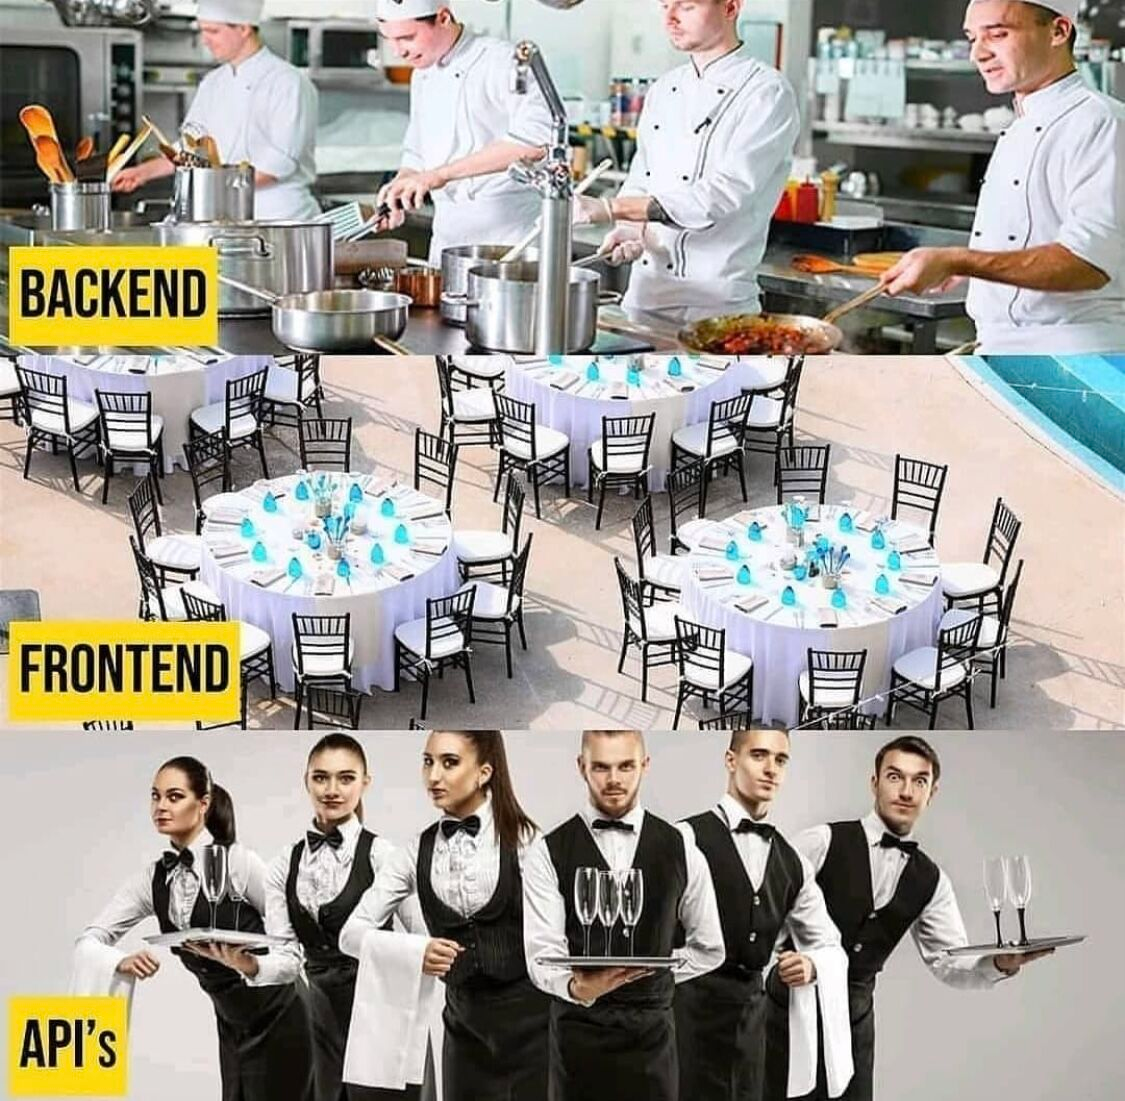